In [54]:
%matplotlib inline

from scipy import stats
from scipy.stats import norm, poisson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import scipy.stats as stats
import random
import math

[MRDB]: Falta un poco de presentación de la base de datos

In [55]:
df = pd.read_csv('/content/Salary Data.csv')

print(df)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

De manera introductoria, se presentan a continuación todos los tipos de trabajos y el número de personas que los realizan, y posteriormente, un gráfico de la relación edad y salario dividido en hombres y mujeres.

In [56]:
tab = pd.crosstab(index=df['Job Title'], columns='People').sort_values(by='People', ascending=False)

tab

col_0,People
Job Title,
Director of Marketing,12
Director of Operations,11
Senior Business Analyst,10
Senior Marketing Analyst,9
Senior Marketing Manager,9
...,...
Junior Designer,1
Junior Data Scientist,1
Junior Data Analyst,1


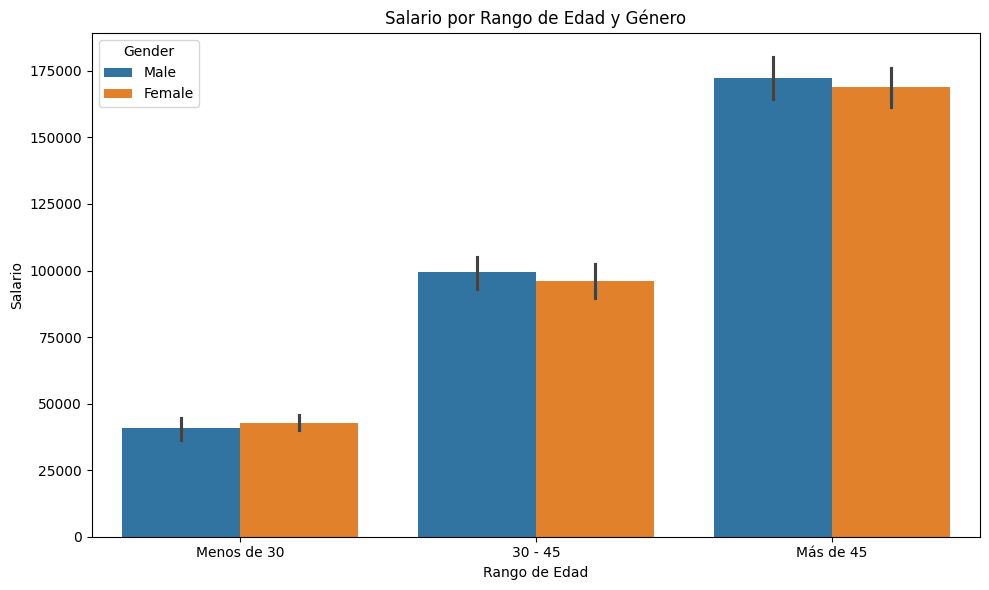

In [57]:
def assign_age_range(age):
    if age < 30:
        return "Menos de 30"
    elif 30 <= age <= 45:
        return "30 - 45"
    else:
        return "Más de 45"


df['Age Range'] = df['Age'].apply(assign_age_range)


df['Age Range'] = pd.Categorical(df['Age Range'], categories=["Menos de 30", "30 - 45", "Más de 45"], ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Age Range", y="Salary", hue="Gender")
plt.title('Salario por Rango de Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Salario')
plt.tight_layout()
plt.show()

Como observamos, la media del conjunto de los hombres cobran más a partir de los 30 años mientras que las mujeres cobran más antes de los 30. También observamos una fuerte relación de que a mayor edad mayor salario se percibe, algo que analizaremos a continuación.

# 1. Objetivos

El objetivo de este informe es demostrar la relación entre el salario y la edad de las personas. A su vez, se incluira el tema del genero para demostrar esta relación.

## 1.1 Objetivos Generales




# 2. Módulo 1

## 2.1. Medidas descriptivas univariantes

### 2.1.1 Media y moda

A continuación, vamos a analizar la media y la moda de nuestro conjunto de datos, a través de dos gráficos.

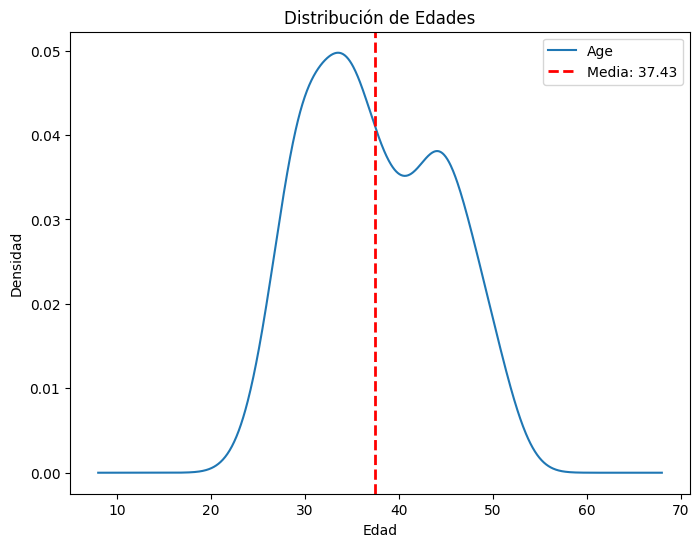

In [58]:
media_edades = df['Age'].mean()

plt.figure(figsize=(8, 6))
df['Age'].plot(kind="density")

plt.axvline(media_edades, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_edades:.2f}')
plt.legend()

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

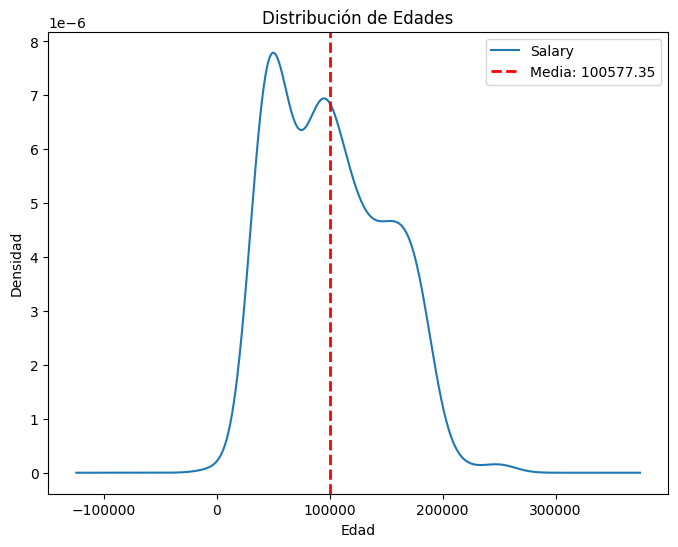

In [59]:
media_edades = df['Salary'].mean()

plt.figure(figsize=(8, 6))
df['Salary'].plot(kind="density")

plt.axvline(media_edades, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_edades:.2f}')
plt.legend()

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

[MRDB]: Variable X entiendo que en el segundo gráfico es Salario, no? Aquí podrías haber comentado que el salario no toma valores negativos

En estos primeros gráficos, observamos que nuestro conjunto de datos posee una media de edad de 37 años y un salario medio de 100.577,35€.

### 2.1.2 Histograma

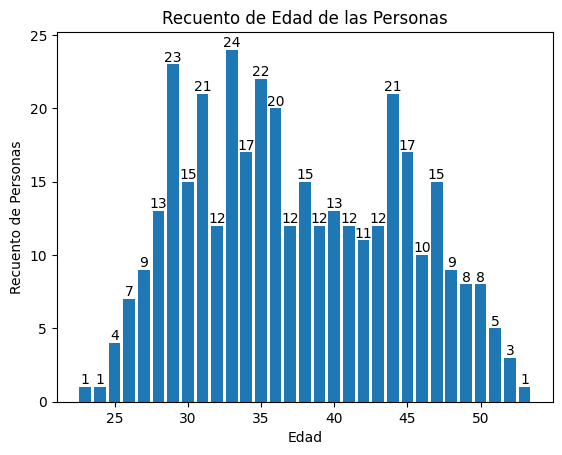

In [60]:
count_by_age = df['Age'].value_counts()

plt.bar(count_by_age.index, count_by_age)
plt.title('Recuento de Edad de las Personas')
plt.xlabel('Edad')
plt.ylabel('Recuento de Personas')

for index, value in count_by_age.items():
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

A través de este tercer gráfico, podemos ver que la moda de edad se sitúa en los 33 años, siendo la edad más frecuenta. La edad de 29 años es la segunda frecuencia más repetida.

## 2.2 Medidas de posición

### 2.2.1 Box-Whisker

A continuación, vamos a realizar un gráfico Box-Whisker de los 5 trabajos mas cómunes de nuestro conjunto de datos:

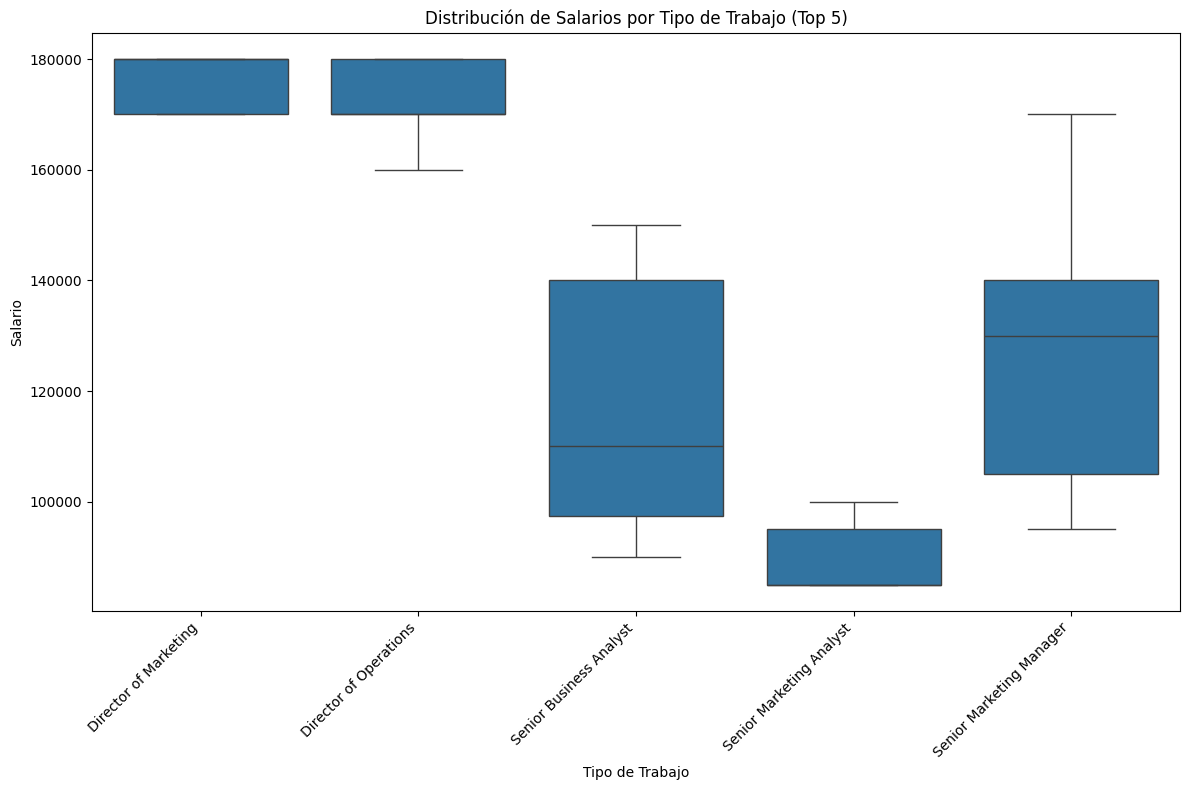

In [61]:
top_jobs = df['Job Title'].value_counts().head(5).index

df_top_jobs = df[df['Job Title'].isin(top_jobs)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Job Title', y='Salary', data=df_top_jobs, order=top_jobs)
plt.title('Distribución de Salarios por Tipo de Trabajo (Top 5)')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Salario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como observamos, se encuentran muchas diferencias de salarios entre los 5 tipos de trabajos, ya que existen muchos máximos y mínimos diferentes, así como la mediana de cada uno de ellos.

[MRDB]: Muchos máximos y mínimos diferentes?

## 2.3 Medidas de dispersión

### 2.3.1 Varianza

A continuación, calcularemos la varianza de la edad y el salario:

In [62]:
var_age = df['Age'].var()

var_age

49.97179221078727

El resultado de la varianza de la edad (Age) es de aproximadamente 49.97. En términos más simples, una varianza más alta indica una mayor variabilidad en los datos, lo que significa que los valores individuales de edad en nuestro conjunto de datos tienden a estar más alejados de la media.

In [63]:
var_salary = df['Salary'].var()

var_salary

2327098900.73222

El resultado de la varianza del salario es de aproximadamente 2,327,098,900.73. Esta varianza es una medida de dispersión que indica qué tan dispersos están los salarios individuales alrededor de la media.

## 2.4 Descriptiva Bivariante

### 2.4.1 Covarianza y coeficiente de correlación de Pearson

En este apartado, calcularemos la covarianza y el coeficiente de correlación de nuestro conjunto de datos:

In [64]:
covariance = df['Age'].cov(df['Salary'])

covariance

314527.54655654554

El resultado de la covarianza entre la edad y el salario es de aproximadamente 314,527.55.

el valor positivo de la covarianza sugiere que hay una tendencia general para que las edades más altas estén asociadas con salarios más altos en tu conjunto de datos.

[MRDB]: Bien explicado :)

In [65]:
correlacion = df['Age'].corr(df['Salary'])

correlacion

0.922335243916644

El coeficiente de correlación de Pearson entre la edad y el salario es aproximadamente 0.922. Este valor positivo cercano a 1 indica una correlación positiva fuerte entre las dos variables. Es decir, hay una relación lineal positiva bastante fuerte entre la edad y el salario en nuestro conjunto de datos.

### 2.4.2 Diagrama de dispersión

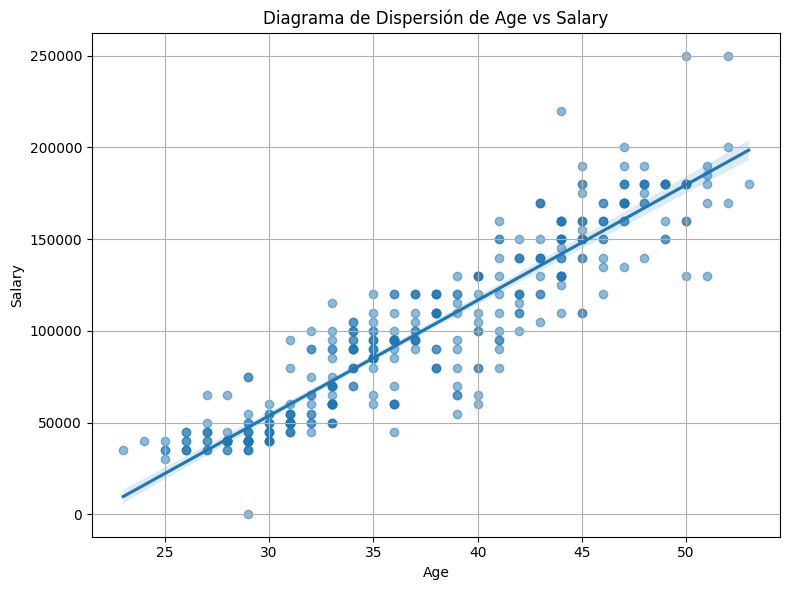

In [66]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'alpha':0.5})
plt.title('Diagrama de Dispersión de Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

Como observamos en el gráfico, encontramos una relación positiva en la que x e y se mueven en la misma dirección perfecta positiva.

# Módulo 2

## 2.1 Distribuciones discretas.

### 2.1.1 Distribución discreta uniforme

En este apartado vamos análizar las distribuciones discretas en función de los campos que tenemos en nuestro archivo.

En este análisis, exploramos la relación entre el nivel educativo y los salarios utilizando una distribución discreta uniforme para simular los salarios dentro de cada nivel educativo. El objetivo es investigar si existe alguna asociación entre el nivel educativo y los salarios, bajo la suposición de que los salarios se distribuyen uniformemente dentro de cada nivel educativo.

### Hipotesis

Nuestra hipótesis nula es que no hay una relación significativa entre el nivel educativo y los salarios. Bajo esta hipótesis, esperaríamos encontrar distribuciones uniformes de salarios dentro de cada nivel educativo, lo que sugiere que el nivel educativo no afecta significativamente los salarios. Por otro lado, si encontramos diferencias significativas en las distribuciones de salarios entre los diferentes niveles educativos, podríamos rechazar la hipótesis nula y sugerir que existe alguna asociación entre el nivel educativo y los salarios.

In [67]:
niveles_educativos = ["Bachelor's", "Master's", "PhD"]
rangos_salarios = {
    "Bachelor's": (35000, 120000),
    "Master's": (55000, 150000),
    "PhD": (80000, 200000)
}

Generaramos salarios para cada nivel educativo utilizando distribución uniforme discreta

In [68]:
salarios_simulados = []
for nivel_educativo in niveles_educativos:
    rango_salario = rangos_salarios[nivel_educativo]
    salarios_nivel = np.random.randint(rango_salario[0], rango_salario[1]+1, size=100)  # Generar 100 salarios
    salarios_simulados.extend(salarios_nivel)

Agregamos columna

In [69]:
df['Education Level'] = np.random.choice(niveles_educativos, size=len(df))

Visualizamos

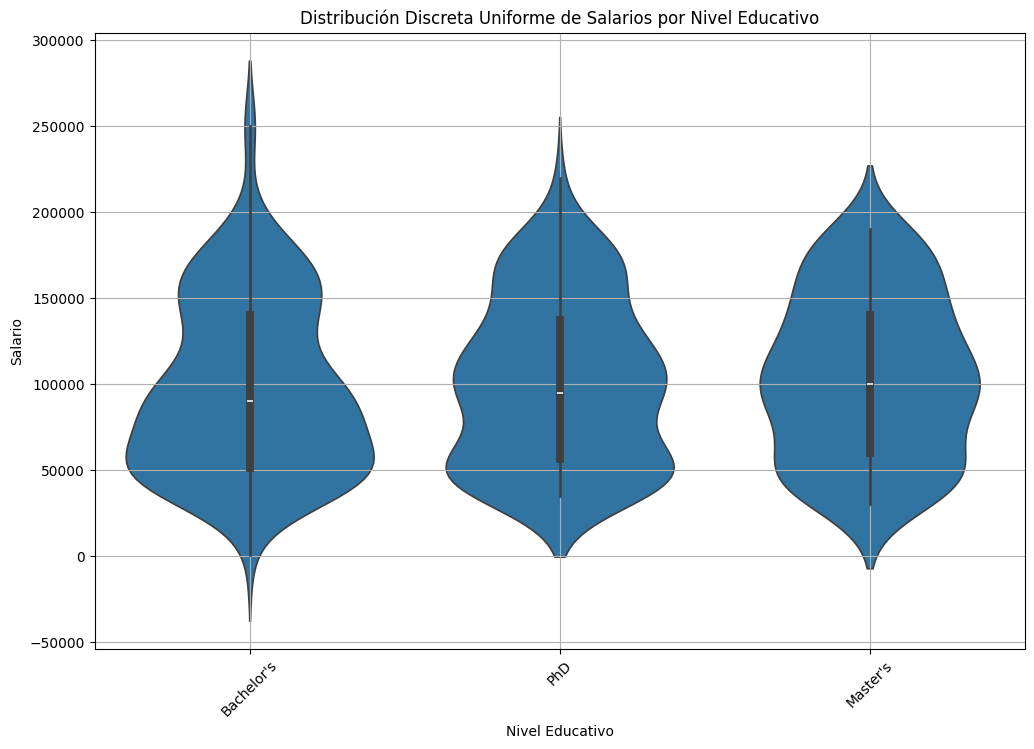

In [70]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Education Level', y='Salary')
plt.title('Distribución Discreta Uniforme de Salarios por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[MRDB]: Podrías haber comentado este gráfico un poco ya que es bastante interesante

### 2.1.2 Distribución de Poisson

### Introducción

[MRDB]: Me he perdido. Por qué habéis simulado datos de repente? O sea, me parece bien que digáis: Con estos datos no observamos diferencia. Vamos a hacer una simulación para así obtener resultados más interesantes.... Pero tenéis que indicar qué estáis haciendo...

Este estudio se centra en explorar la relación entre el nivel educativo y los salarios simulados utilizando una distribución de Poisson. La distribución de Poisson es una herramienta estadística útil para modelar eventos discretos aleatorios en un intervalo de tiempo o espacio fijo. Al simular los salarios bajo esta distribución, buscamos comprender si hay una asociación significativa entre el nivel educativo y los salarios simulados.

### Hipotesis

Nuestra hipótesis nula sugiere que no hay una relación significativa entre el nivel educativo y los salarios simulados, considerando que los salarios siguen una distribución aleatoria. La hipótesis alternativa plantea que existen diferencias significativas en la distribución de los salarios entre los diferentes niveles educativos, lo que indica que el nivel educativo puede influir en la variabilidad de los salarios simulados.

Generamos salarios para cada nivel educativo utilizando distribución de Poisson

In [71]:
niveles_educativos = df['Education Level'].unique()  # Ajustamos el nombre de la columna
parametros_poisson = {
    nivel_educativo: np.mean(df[df['Education Level'] == nivel_educativo]['Salary'])
                      for nivel_educativo in niveles_educativos
}

Generar salarios simulados para cada nivel educativo utilizando distribución de Poisson

In [72]:
df = df.dropna(subset=['Education Level'])

In [73]:
salarios_medios_por_nivel = df.groupby('Education Level')['Salary'].mean()

Generamos salarios simulados utilizando distribución de Poisson con la media calculada

In [74]:
salarios_simulados = []
for nivel_educativo in df['Education Level']:
    salario_simulado = np.random.poisson(salarios_medios_por_nivel[nivel_educativo])
    salarios_simulados.append(salario_simulado)

Agregamos los salarios simulados al DataFrame

In [75]:
df['Simulated Salary'] = salarios_simulados

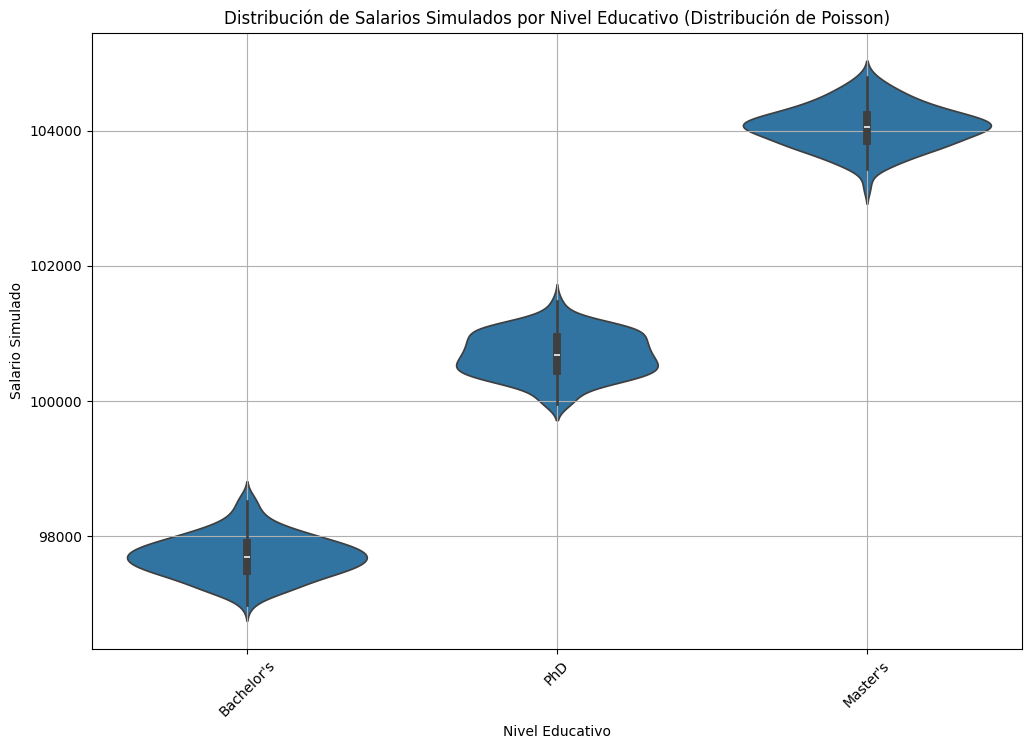

In [76]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Education Level', y='Simulated Salary')
plt.title('Distribución de Salarios Simulados por Nivel Educativo (Distribución de Poisson)')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Simulado')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

En resumen, estos hallazgos respaldan la noción de que la educación juega un papel importante en la determinación de los salarios, y sugieren que las personas con niveles educativos más altos tienden a ganar salarios más altos en general. Sin embargo, también destacan la variabilidad en los salarios dentro de cada nivel educativo, lo que puede estar influenciado por otros factores como la experiencia laboral, la industria y las habilidades específicas.

## 2.2 Distribución normal

### Hipotesis

Hipótesis nula (H0): La distribución de los salarios en tu conjunto de datos sigue una distribución normal.


Hipótesis alternativa (H1): La distribución de los salarios en tu conjunto de datos no sigue una distribución normal.

In [77]:
salarios = df['Salary']
mu = salarios.mean()
sigma = salarios.std()
salarios_normalizados = (salarios - mu) / sigma


Generamos una distribución normal con los mismos parámetros de media y desviación estándar

In [78]:
salarios_distribucion_normal = np.random.normal(mu, sigma, size=len(salarios))

Visualización:

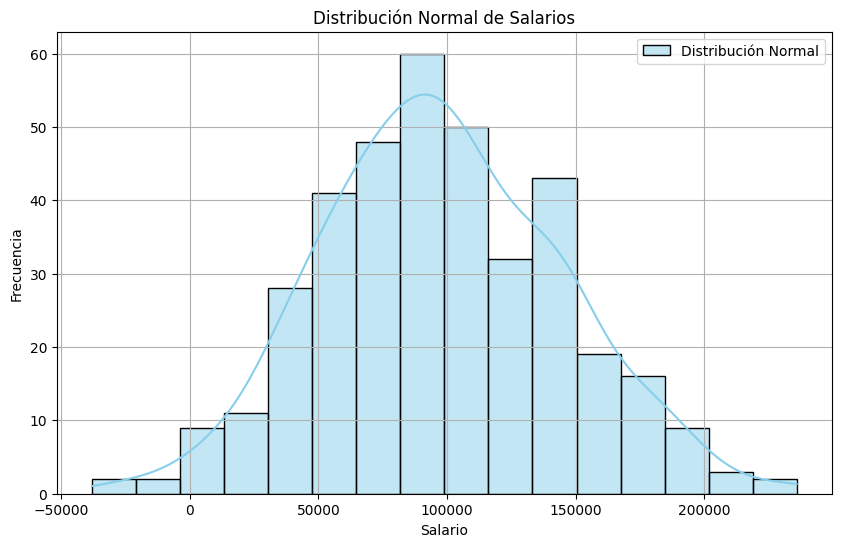

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(salarios_distribucion_normal, kde=True, color='skyblue', label='Distribución Normal')
plt.title('Distribución Normal de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

##  2.3 Relación entre las principales distribuciones

[MRDB]: No entiendo muy bien por qué habéis hecho esto.

In [80]:
mu_normal = salarios.mean()
sigma_normal = salarios.std()

In [81]:
lambda_poisson = salarios.mean()

In [82]:
mu_normal = 100
sigma_normal = 20
lambda_poisson = 10

In [83]:
datos_normal = norm.rvs(loc=mu_normal, scale=sigma_normal, size=1000)
datos_poisson = poisson.rvs(mu=lambda_poisson, size=1000)

In [84]:
peso_normal = 0.6
peso_poisson = 0.4
datos_combinados = peso_normal * datos_normal + peso_poisson * datos_poisson


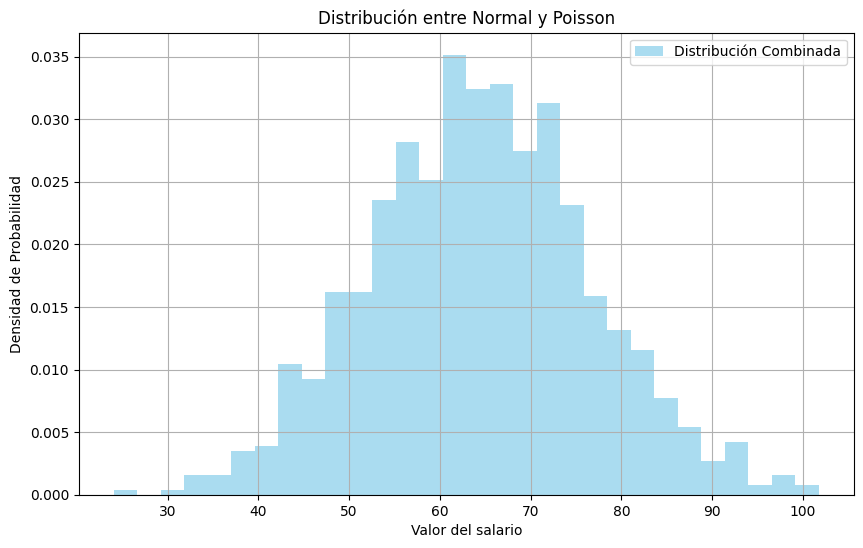

In [85]:

plt.figure(figsize=(10, 6))
plt.hist(datos_combinados, bins=30, density=True, color='skyblue', alpha=0.7, label='Distribución Combinada')
plt.title('Distribución entre Normal y Poisson')
plt.xlabel('Valor del salario')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Módulo 3

## 3.1 Intervalos de confianza

### 3.1.1 Intervalo de confianza de Salarios

A continuación, vamos a ver los intervalos de confianza para distintos tipos de confianza:

In [86]:
sample_mean = df['Salary'].mean()

pop_stdev = df['Salary'].std()

sample_size = len(df['Salary'])

In [87]:
ic1 = stats.norm.interval(confidence=0.90,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))
ic2 = stats.norm.interval(confidence=0.95,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))
ic3 = stats.norm.interval(confidence=0.99,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))

print(f'El intervalo de confianza para un 90% es: {ic1}')
print(f'El intervalo de confianza para un 95% es: {ic2}')
print(f'El intervalo de confianza para un 99% es: {ic3}')

El intervalo de confianza para un 90% es: (96479.84507845693, 104674.8466105511)
El intervalo de confianza para un 95% es: (95694.8725371606, 105459.81915184743)
El intervalo de confianza para un 99% es: (94160.68823341948, 106994.00345558855)


Como observamos en el análisis anterior:

*   Intervalo de Confianza del 90%: Hay un 90% de probabilidad de que la verdadera media poblacional de los salarios esté dentro del rango de aproximadamente 96,479.85 a 104,674.85.


*   Intervalo de Confianza del 95%: Hay un 95% de probabilidad de que la verdadera media poblacional de los salarios esté dentro del rango de aproximadamente 95,694.87 a 105,459.82.

*   Intervalo de Confianza del 99%: Hay un 99% de probabilidad de que la verdadera media poblacional de los salarios esté dentro del rango de aproximadamente 94,160.69 a 106,994.00.

Estos intervalos nos permiten tener una idea de la precisión de nuestra estimación de la media poblacional, con una mayor certeza asociada a intervalos de confianza más amplios.



### 3.1.2 Intervalo de confianza de Edades

In [88]:
sample_mean = df['Age'].mean()

pop_stdev = df['Age'].std()

sample_size = len(df['Age'])

In [89]:
icA = stats.norm.interval(confidence=0.90,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))
icB = stats.norm.interval(confidence=0.95,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))
icC = stats.norm.interval(confidence=0.99,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))

print(f'El intervalo de confianza para un 90% es: {icA}')
print(f'El intervalo de confianza para un 95% es: {icB}')
print(f'El intervalo de confianza para un 99% es: {icC}')

El intervalo de confianza para un 90% es: (36.83118920951362, 38.03208156796628)
El intervalo de confianza para un 95% es: (36.71615963657868, 38.14711114090122)
El intervalo de confianza para un 99% es: (36.49134086142589, 38.37192991605401)


Como observamos en el análisis anterior:


[MRDB]: La definición de intervalo de confianza no es esta exactamente
*   Intervalo de Confianza del 90%: Hay un 90% de probabilidad de que la verdadera media poblacional de los salarios esté dentro del rango de aproximadamente 36,83 a 38,03.


*   Intervalo de Confianza del 95%: Hay un 95% de probabilidad de que la verdadera media poblacional de los salarios esté dentro del rango de aproximadamente 36,72 a 38,15.

*   Intervalo de Confianza del 99%: Hay un 99% de probabilidad de que la verdadera media poblacional de los salarios esté dentro del rango de aproximadamente 36,49 a 38,37.

Estos intervalos nos permiten tener una idea de la precisión de nuestra estimación de la media poblacional, con una mayor certeza asociada a intervalos de confianza más amplios.

## 3.2 T-Test

### 3.2.1 T-Test para 1 muestra

In [90]:
sales_associate_df = df[df['Job Title'] == 'Sales Associate']
sales_associate_salaries = sales_associate_df['Salary']

stats.ttest_1samp(a = sales_associate_salaries,
                 popmean = 105000)

TtestResult(statistic=-5.5, pvalue=0.11449829409740034, df=1)

El resultado del t-test indica que el valor del estadístico t es aproximadamente -5.5 y el valor p asociado es aproximadamente 0.114. Aquí está la interpretación:

El valor del estadístico t nos indica cuántas desviaciones estándar difiere la media de la muestra de la media poblacional hipotética, bajo la suposición de que la media poblacional es igual a 105,000. Un valor negativo indica que la media de los salarios de los asociados de ventas es menor que la media poblacional hipotética de 105,000. El valor p es la probabilidad de observar un estadístico t al menos tan extremo como el observado, si la verdadera media poblacional es igual a 105,000. En este caso, el valor p es aproximadamente 0.114, lo que significa que hay un 11.4% de probabilidad de observar una diferencia en los salarios de los asociados de ventas tan grande como la que se observó, bajo la hipótesis nula de que la media poblacional es 105,000.

Dado que el valor p es mayor que un nivel de significancia comúnmente elegido (como 0.05), no hay suficiente evidencia para rechazar la hipótesis nula de que la media poblacional de los salarios de los asociados de ventas es igual a 105,000. En otras palabras, no hay suficiente evidencia para concluir que la media de los salarios de los asociados de ventas es significativamente diferente de 105,000.

### 3.2.2 T-Test para dos muestras

In [91]:
sales_associate_df = df[df['Job Title'] == 'Sales Associate']
data_analyst_df = df[df['Job Title'] == 'Data Analyst']

sales_associate_salaries = sales_associate_df['Salary']
data_analyst_salaries = data_analyst_df['Salary']

stats.ttest_ind(a= sales_associate_salaries,
                b= data_analyst_salaries,
                equal_var=False)

TtestResult(statistic=-1.8, pvalue=0.22343252748609246, df=1.8545994065281899)

El resultado del t-test indica que el valor del estadístico t es aproximadamente -1.8 y el valor p asociado es aproximadamente 0.223. Aquí está la interpretación:

El valor del estadístico t nos indica cuántas desviaciones estándar difiere la diferencia entre las medias de las dos muestras de sus medias poblacionales esperadas, bajo la suposición de que las medias poblacionales son iguales. Un valor negativo indica que la media de las ventas asociadas es menor que la media de los salarios de los analistas de datos.

El valor p es la probabilidad de observar un estadístico t al menos tan extremo como el observado, si la verdadera diferencia entre las medias de las dos poblaciones es cero. En este caso, el valor p es aproximadamente 0.223, lo que significa que hay un 22.3% de probabilidad de observar una diferencia en los salarios entre las dos ocupaciones tan grande como la que se observó, bajo la hipótesis nula de que no hay diferencia real entre las medias de las poblaciones.

Dado que el valor p es mayor que un nivel de significancia comúnmente elegido (como 0.05), no hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia significativa en los salarios entre los asociados de ventas y los analistas de datos. En otras palabras, no hay suficiente evidencia para concluir que los salarios de estos dos tipos de trabajo son diferentes.

# Módulo 4

## 4.1 Anova

In [92]:
from scipy.stats import f_oneway

software_engineer_df = df[df['Job Title'] == 'Software Engineer']
data_analyst_df = df[df['Job Title'] == 'Data Analyst']
sales_associate_df = df[df['Job Title'] == 'Sales Associate']


software_engineer_salaries = software_engineer_df['Salary']
data_analyst_salaries = data_analyst_df['Salary']
sales_associate_salaries = sales_associate_df['Salary']

anova = f_oneway(software_engineer_salaries, data_analyst_salaries, sales_associate_salaries)

anova

F_onewayResult(statistic=3.736, pvalue=0.21114864864864863)

El valor del estadístico F es una medida de la variación entre las medias de los grupos en comparación con la variación dentro de los grupos. Un valor mayor de F indica una mayor diferencia entre las medias de los grupos en relación con la variabilidad dentro de los grupos.

En este caso, el valor p es aproximadamente 0.211, lo que significa que hay un 21.1% de probabilidad de observar una diferencia en los salarios de los tres tipos de trabajos tan grande como la que se observó, bajo la hipótesis nula de que no hay diferencia real entre las medias de los grupos.

Dado que el valor p es mayor que un nivel de significancia comúnmente elegido (como 0.05), no hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencias significativas en los salarios entre los tres tipos de trabajos.

[MRDB]:Bien explicado.

# Conclusiones

[MRDB]: Bien que hayáis puesto un apartado de conclusiones, aunque creo que podrían ser mejorables Tendríais que habe explicado un poco mejor el por qué habéis cogido y habéis simualado datos. También en la parte del ANOVA podrías haber dicho que no hacéis el post-hoc porque no sale significativo. Nota: 6



1.   La edad y el salario medio de nuestro conjuntos de datos es de 37 años y 100.577,35€, respectivamente.

2.   Por otra parte, la moda de la edad es de 33 años.

3.   En cuanto a los salarios en función del trabajo, observamos muchas diferencias debido al tipo de trabajo que se desarrolla y aparece en nuestro conjunto de datos. También se encuentran diferencias salariales entre hombres y mujeres, cobrando más estos primeros a partir de los 30 años (en base a la media de ambos grupos).

4.   La varianza, nos permite verificar la anterior afirmación, ya que en el salario encontramos una varianza sumamente elevada debido a las diferencias salariales entre los distintos trabajos, mientras que la edad posee una varianza más baja ya que hay menores diferencias.

5.   A su vez, el coeficiente de correlación de Pearson nos permite afirmar qur hay una relación muy fuerte entre la edad y el salario, por lo que a mayor edad es normal tener mayor salario.

6.   En cuanto a los análisis T-test de muestras, ambos análisis nos permiten rechazar la hipótesis nula ya que no se presentan suficientes evidencias que permitan decir lo contrario.

7.  En la anova, rechazamos la hipótesis nula de que no hay diferencias significativas en los salarios entre los tres tipos de trabajos ya que no encontramos suficientes evidencias.

8.  Los gráficos de violín muestran variaciones en los salarios según el nivel educativo, con Masters teniendo una concentración alta, Bachelors mayor variabilidad y PhD una distribución más equitativa.

9. La distribución de salarios simulados por nivel educativo, generada mediante la distribución de Poisson, muestra que los salarios tienden a agruparse en torno a valores específicos para cada nivel educativo, lo que sugiere que existe una relación entre el nivel de educación y el salario esperado, con una dispersión moderada alrededor de estos valores centrales.

10. La distribución normal de salarios muestra que la mayoría de los salarios se concentran alrededor de un valor central, con una disminución gradual a medida que nos alejamos de este punto.

11. La combinación de la distribución normal y Poisson muestra una distribución de salarios desplazada hacia la derecha en comparación con la distribución normal sola, indicando una tendencia hacia salarios más altos en el conjunto de datos.

